### Nikita Roy and Michael Kolor

In [71]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
from sklearn.utils import resample

import statsmodels.api as sm
from statsmodels.api import OLS
import seaborn as sns
%matplotlib inline


In [41]:
# Read in Dataframe
data = pd.read_csv("worldcup_df.csv")
data = data.drop(columns="Unnamed: 0")
# Clean data more
data["goal_difference"] = data["score_team1"] - data["score_team2"]
fifa_data = data.copy().drop(columns=["team1", "team2", "score_team1", "score_team2", "winning_team", "nationality_team1", "nationality_team2"])

Index(['rank_team1', 'rank_team2', 'goal_difference', 'population_team1',
       'GDP_per_capita_team1', 'population_team2', 'GDP_per_capita_team2',
       'players_in_top_200_team1', 'age_team1', 'eur_value_team1',
       'overall_average_team1', 'top_3_leagues_team1',
       'players_in_top_200_team2', 'age_team2', 'eur_value_team2',
       'overall_average_team2', 'top_3_leagues_team2',
       'confederation_team1_CAF', 'confederation_team1_CONCACAF',
       'confederation_team1_CONMEBOL', 'confederation_team1_OFC',
       'confederation_team1_UEFA', 'confederation_team2_CAF',
       'confederation_team2_CONCACAF', 'confederation_team2_CONMEBOL',
       'confederation_team2_OFC', 'confederation_team2_UEFA', 'host_team1',
       'rank_diff'],
      dtype='object')

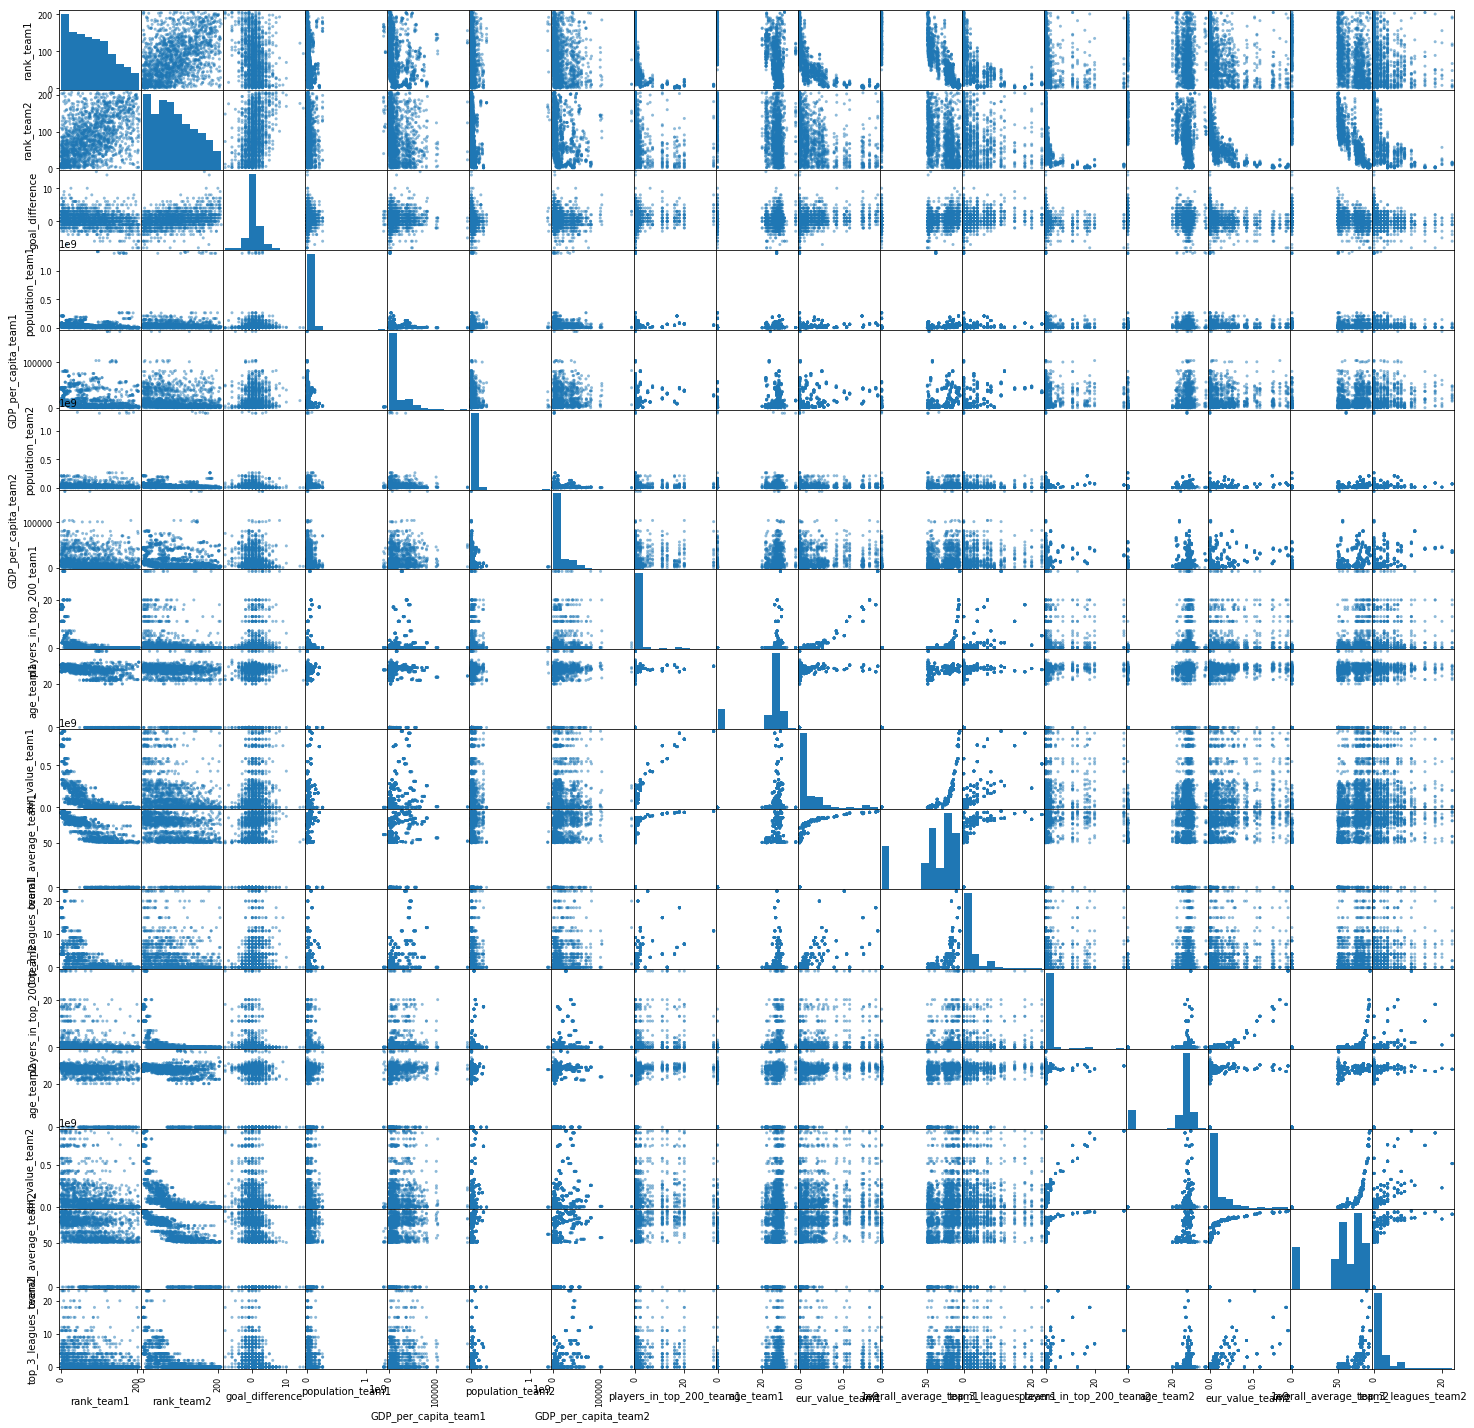

In [42]:
# Get Training and Test Data
X_train, X_test, y_train, y_test = train_test_split(fifa_data.copy().drop(columns="goal_difference"), fifa_data["goal_difference"],  test_size=200)

train = X_train.copy()
train["goal_difference"] = y_train
scatter_matrix(train[['rank_team1', 'rank_team2', 'goal_difference', 'population_team1',
       'GDP_per_capita_team1', 'population_team2', 'GDP_per_capita_team2',
       'players_in_top_200_team1', 'age_team1', 'eur_value_team1',
       'overall_average_team1', 'top_3_leagues_team1',
       'players_in_top_200_team2', 'age_team2', 'eur_value_team2',
       'overall_average_team2', 'top_3_leagues_team2']], figsize=(25,25));

# No apparent nonlinear relationship with goal_difference

,rank_team1,rank_team2,population_team1,GDP_per_capita_team1,population_team2,GDP_per_capita_team2,players_in_top_200_team1,age_team1,eur_value_team1,overall_average_team1,...,confederation_team1_CONMEBOL,confederation_team1_OFC,confederation_team1_UEFA,confederation_team2_CAF,confederation_team2_CONCACAF,confederation_team2_CONMEBOL,confederation_team2_OFC,confederation_team2_UEFA,host_team1,rank_diff
rank_team1,1.000000,0.473547,0.030794,-0.197960,0.040349,-0.154160,-0.456090,-0.496202,-0.660803,-0.697794,...,-0.297315,0.258586,-0.306979,0.121937,-0.012971,-0.272728,0.211238,-0.244091,-0.019224,0.506317
rank_team2,0.473547,1.000000,0.064012,-0.181525,-0.023876,-0.213853,-0.257390,-0.334085,-0.364651,-0.432840,...,-0.239217,0.206900,-0.308927,0.133845,0.014928,-0.306638,0.232684,-0.255805,-0.008228,-0.519764
population_team1,0.030794,0.064012,1.000000,-0.097817,-0.002754,-0.025394,0.047308,0.064334,0.049840,0.069489,...,0.016090,-0.047751,-0.100817,-0.036589,-0.019836,0.020362,0.011360,-0.102121,-0.054402,-0.032804
GDP_per_capita_team1,-0.197960,-0.181525,-0.097817,1.000000,-0.017173,0.256702,0.207667,0.100864,0.260627,0.190220,...,-0.077866,-0.036517,0.427484,-0.373850,-0.060869,-0.025385,-0.042105,0.412777,-0.155636,-0.014285
population_team2,0.040349,-0.023876,-0.002754,-0.017173,1.000000,-0.083254,0.008603,-0.030880,0.000535,-0.040986,...,0.019067,-0.045181,-0.063461,-0.032730,-0.045372,0.045201,-0.051222,-0.100242,-0.022134,0.062514
GDP_per_capita_team2,-0.154160,-0.213853,-0.025394,0.256702,-0.083254,1.000000,0.144458,0.121203,0.173885,0.157723,...,-0.066076,-0.038637,0.411310,-0.401136,-0.076504,-0.079241,-0.000540,0.439971,-0.076080,0.059851
players_in_top_200_team1,-0.456090,-0.257390,0.047308,0.207667,0.008603,0.144458,1.000000,0.183108,0.905366,0.359763,...,0.221734,-0.055230,0.304838,-0.184349,-0.033966,0.214217,-0.059233,0.209171,-0.021240,-0.190381
age_team1,-0.496202,-0.334085,0.064334,0.100864,-0.030880,0.121203,0.183108,1.000000,0.309980,0.926961,...,0.143435,-0.149968,0.277103,-0.054390,-0.017795,0.131569,-0.139197,0.235619,0.001537,-0.154198
eur_value_team1,-0.660803,-0.364651,0.049840,0.260627,0.000535,0.173885,0.905366,0.309980,1.000000,0.549263,...,0.281450,-0.090660,0.386464,-0.215031,-0.044670,0.266694,-0.086134,0.278403,-0.023199,-0.283928
overall_average_team1,-0.697794,-0.432840,0.069489,0.190220,-0.040986,0.157723,0.359763,0.926961,0.549263,1.000000,...,0.212082,-0.174057,0.379230,-0.101363,-0.044356,0.198196,-0.158725,0.312327,-0.009286,-0.253045


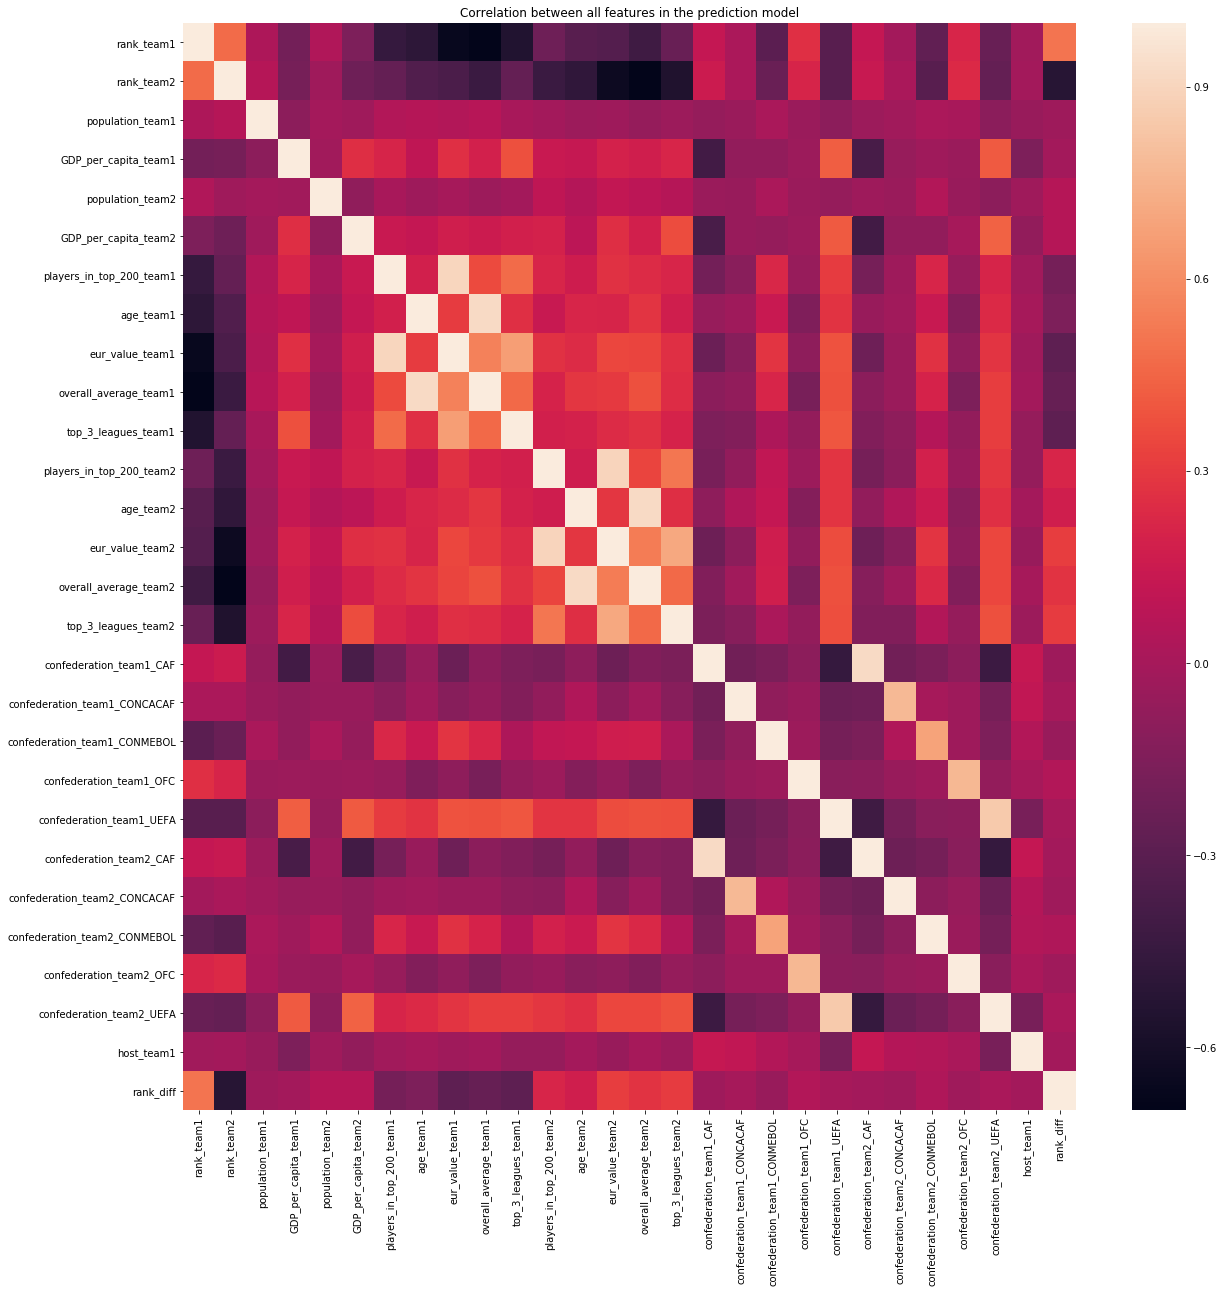

In [43]:
# store the correlation matrix
corr = X_train.corr(method = 'pearson')

# initialize and create the heatmap
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(corr)

# set the title
ax.set_title("Correlation between all features in the prediction model");

# print the correlation matrix
corr

In [44]:
# Iterate over the pairs of indexes to enumerate which pairs are highly correlated
#curr_data = X_train.copy()
print("Unique variables with absolute correlations > .7:")
for row_name in corr.index:
    for col_name in corr.index:
        # col_name < row_name excludes correlations between a variable
        # and itself, as well as repeat pairings.
        if np.abs(corr.loc[row_name,col_name])> .7 and col_name < row_name:
            #curr_data = curr_data.drop(columns=row_name)
            print("(",row_name,",",col_name,"): {0}".format(corr.loc[row_name,col_name]))


Unique variables with absolute correlations > .7:
( players_in_top_200_team1 , eur_value_team1 ): 0.9053661729448015
( overall_average_team1 , age_team1 ): 0.9269606387951325
( players_in_top_200_team2 , eur_value_team2 ): 0.898399022240097
( overall_average_team2 , age_team2 ): 0.9222943181855562
( top_3_leagues_team2 , eur_value_team2 ): 0.7060994201513501
( confederation_team2_CAF , confederation_team1_CAF ): 0.9233487059719723
( confederation_team2_CONCACAF , confederation_team1_CONCACAF ): 0.7805973472333066
( confederation_team2_OFC , confederation_team1_OFC ): 0.7689930944060741
( confederation_team2_UEFA , confederation_team1_UEFA ): 0.8494651928079117


In [45]:
# initialize a dataframe storing all of the predictors
complete_list_predictors = X_train.copy()

def get_bic(X_trn, y_trn = y_train) -> float:
    """Returns the BIC score
    
    Args:
        X_train: the matrix of predictor variables
        y_trn: the response variables, default set to y_train
        
    Returns:
        the calculated BIC value for the given data
    """
    
    # add constant to data matrix
    X_trn = sm.add_constant(X_trn)
    
    # return the BIC value
    return OLS(endog = y_trn, exog = X_trn).fit().bic

# initialize a dataframe storing the remaining predictors
remaining_predictors = complete_list_predictors.copy()

# initialize variables
best_model_bic = np.inf
best_model = []
best = []

# iterate through for each predictor in complete_list_predictors
for i in range(len(complete_list_predictors.columns)):
    
    # reset the best bic for i number of predictors to infinity
    best_bic = np.inf
    
    # iterate through for each remaining predictor not yet selected
    for col in range(len(remaining_predictors.columns)):
        
        # Get the BIC value for the selected predictor list with the current predictor added
        curr_col = remaining_predictors.columns[col]
        curr_bic = get_bic(complete_list_predictors[best_model + [curr_col]])
        
        # If the BIC is lower than previous BIC's involving the same number of predictors, 
        # store the BIC and variable name
        if curr_bic < best_bic:
            best_bic = curr_bic
            best_col = curr_col
    
    # After iterating through the remaining predictors, store the best predictor found in the selected subset
    best_model.append(best_col)
    
    # Drop the newly selected predictor from the datarame of remaining predictors
    remaining_predictors = remaining_predictors.drop(columns= best_col)

    # If the BIC for the model with col amount of predictors is the lowest so far
    if  best_bic < best_model_bic:
        
        # store the model and bic as the best overall
        best = best_model.copy()
        best_model_bic = best_bic

# print the overall results
print("The forward step-selection method selects the following subset of predictors:\n {0}".format(best))

The forward step-selection method selects the following subset of predictors:
 ['rank_diff', 'host_team1', 'overall_average_team2', 'eur_value_team1', 'eur_value_team2']


In [122]:
# Print stepwise old and summary of values
goal_difference_ols = OLS(y_train.values.reshape(-1,1), sm.add_constant(X_train[best])).fit()
goal_difference_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     182.3
Date:                Fri, 10 Aug 2018   Prob (F-statistic):          1.85e-157
Time:                        22:00:19   Log-Likelihood:                -3579.0
No. Observations:                1817   AIC:                             7170.
Df Residuals:                    1811   BIC:                             7203.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.2069      0.108     11.188      0.000       0.995       1.418
rank_diff                -0.0159      0.001    -18.168      0.000      -0.018      -0.014
host_team1               -0.6254      0.092     -6.762      0.000      -0.807      -0.444
overall_average_team2    -0.0114      0.002     -5.712      0.000      -0.015      -0.007
eur_value_team1        1.508e-09   2.42e-10      6.237      0.000    1.03e-09    1.98e-09
eur_value_team2       -1.241e-09   2.71e-10     -4.578      0.000   -1.77e-09   -7.09e-10
==============================================================================
Omnibus:                      216.530   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1100.738
Skew:                           0.443   Prob(JB):                    9.50e-240
Kurtosis:                       6.709   Cond. No.                     8.09e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
# Value on test set
X_train_best_predictors = X_train[best]
X_test_best_predictors = X_test[best]

# Print R^2 score on test set
r2_score(y_test, goal_difference_ols.predict(sm.add_constant(X_test[best])))

0.3958384377109282

In [125]:
# Transform data and normalize
scaler = MinMaxScaler()
# define k values
k_values = [1, 2 ,3 ,4 ,5 ,6 ,7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 50, 75, 100, 200]

# Normalize data
X_train_normalize = scaler.fit_transform(X_train_best_predictors)
X_test_normalize = scaler.fit_transform(X_test_best_predictors)


# build a dictionary KNN models
KNNModels = {k: KNeighborsRegressor(n_neighbors=k) for k in k_values}
 
# fit each KNN model
for k_value in KNNModels: 
    KNNModels[k_value].fit(X_train_normalize, y_train)
    print(k_value)
    print(r2_score(y_train, KNNModels[k_value].predict(X_train_normalize)))
    print(r2_score(y_test, KNNModels[k_value].predict(X_test_normalize)))

1
0.9463438913433282
-0.13745725020253485
2
0.6851505778315137
0.09905991224397703
3
0.570426679598286
0.2170466346598231
4
0.5054984283114072
0.2884775363067438
5
0.46906489634549176
0.29973520952158283
6
0.44080506613712866
0.3280556476854847
7
0.4229354915068795
0.3842231568000598
8
0.4103132063609076
0.39253149484283845
9
0.395813380334208
0.3822562388072205
10
0.38789695256535817
0.3842724242737292
15
0.3628871765475091
0.38609689893679044
20
0.35544382784366735
0.40941664537106015
25
0.34636804915086705
0.4116140257395918
30
0.3374799478729442
0.4158926242289027
35
0.3343942960589471
0.408253256119514
40
0.3279145788187282
0.3936495141883112
50
0.31748485635871815
0.38648383255672325
75
0.29700075207371446
0.366461781786789
100
0.28531722836936924
0.350489726455668
200
0.23849665853373703
0.2656187778315454


In [126]:
# Ideal K: k = 8
knn_model = KNeighborsRegressor(n_neighbors=8).fit(X_train_normalize, y_train)

In [50]:
# Read in data
world_cup_data = pd.read_csv("worldcup_2018_prediction_df.csv").drop(columns="Unnamed: 0")

In [127]:
# Bagging 
# Initialize empty dataframes to store 
bagg_test = pd.DataFrame()
bagg_train = pd.DataFrame()

# Store all the bagg ols models in this list
bagg_ols_models=[]

# Create 25 Bootstrap samples
for i in range(25):
    
    # Store the values of the Bootstrap sample
    boot_X, boot_y = resample(X_train, y_train)
    
    # Fit the sample to a Decision Tree Model
    curr_ols_model = OLS(boot_y, sm.add_constant(boot_X)).fit()
    
    # append
    bagg_ols_models.append(curr_ols_model)
    
    # Store the model's predictions on the test data in the dataframe
    bagg_test["bootstrap model {0}'s predictions".format(i+1)] = curr_ols_model.predict(sm.add_constant(X_test))

    # Store the model's predictions on the training data in the dataframe
    bagg_train["bootstrap model {0}'s predictions".format(i+1)] = curr_ols_model.predict(sm.add_constant(X_train))
    
# Print the test R^2 Score
r2_score(y_test, round(np.mean(bagg_test, axis=1)))

0.3562383440536323

In [52]:
# Read in data
group_data = pd.read_csv("fifa_countries.csv").drop(columns="Unnamed: 0")

In [128]:
### Store the model's predictions on the world cup data in the dataframe

# Get model's predictions
wc_predictors = world_cup_data.copy().drop(columns=["team1", "team2", "Group"])
bagg_world_cup = pd.DataFrame()
for curr_model in bagg_ols_models:
    bagg_world_cup["bootstrap model {0}'s predictions".format(i+1)] = curr_model.predict(sm.add_constant(wc_predictors))
    
predicted_goal_differential = round(np.mean(bagg_world_cup, axis=1))
world_cup_data_group_predictions = world_cup_data.copy()

# Adds match point
def match_points(world_cup, predictions):
    for i in range(world_cup.shape[0]):
        print(str(world_cup.iloc[i,0]) + ' and ' +  str(world_cup.iloc[i,1]))
        if predictions[i] > 0:
            print("Winner: " + str(world_cup.iloc[i,0]))
            world_cup.at[i,'points_team1'] = 3
            world_cup.at[i,'points_team2'] = 0
        elif predictions[i] == 0:
            print("Draw")
            world_cup.at[i,'points_team1'] = 1
            world_cup.at[i,'points_team2'] = 1
        elif predictions[i] < 0:
            print("Winner: " + world_cup.iloc[i,1])
            world_cup.at[i,'points_team2'] = 3
            world_cup.at[i,'points_team1'] = 0
        print()
# Call the function
match_points(world_cup_data_group_predictions, predicted_goal_differential)

# Print the predictions
world_cup_data_group_predictions

Saudi Arabia and Russia
Draw

Uruguay and Egypt
Winner: Uruguay

Spain and Portugal
Winner: Spain

Morocco and Iran
Winner: Morocco

France and Australia
Winner: France

Peru and Denmark
Draw

Iceland and Argentina
Draw

Nigeria and Croatia
Draw

Switzerland and Brazil
Draw

Serbia and Costa Rica
Winner: Serbia

Mexico and Germany
Winner: Germany

Sweden and Korea Republic
Winner: Sweden

Panama and Belgium
Winner: Belgium

Tunisia and England
Winner: England

Senegal and Poland
Draw

Japan and Colombia
Winner: Colombia

Russia and Egypt
Draw

Uruguay and Saudi Arabia
Winner: Uruguay

Portugal and Morocco
Winner: Portugal

Spain and Iran
Winner: Spain

Peru and France
Draw

Denmark and Australia
Winner: Denmark

Croatia and Argentina
Draw

Nigeria and Iceland
Draw

Costa Rica and Brazil
Winner: Brazil

Switzerland and Serbia
Winner: Switzerland

Sweden and Germany
Winner: Germany

Mexico and Korea Republic
Draw

Tunisia and Belgium
Winner: Belgium

Panama and England
Winner: England

P

,team1,team2,rank_team1,rank_team2,population_team1,GDP_per_capita_team1,population_team2,GDP_per_capita_team2,players_in_top_200_team1,age_team1,...,confederation_team2_CAF,confederation_team2_CONCACAF,confederation_team2_CONMEBOL,confederation_team2_OFC,confederation_team2_UEFA,host_team1,rank_diff,Group,points_team1,points_team2
0,Saudi Arabia,Russia,67.0,70.0,32938213.0,20760.901631,144495044.0,10917.467868,0.0,27.304348,...,0,0,0,0,1,1,-3.0,A,1.0,1.0
1,Uruguay,Egypt,14.0,45.0,3456750.0,16245.598368,97553151.0,2412.725756,4.0,27.130435,...,1,0,0,0,0,0,-31.0,A,3.0,0.0
2,Spain,Portugal,10.0,4.0,46572028.0,28156.815503,10293718.0,21136.289143,32.0,28.173913,...,0,0,0,0,1,0,6.0,B,3.0,0.0
3,Morocco,Iran,41.0,37.0,35739580.0,3053.729227,81162788.0,5415.215653,1.0,26.695652,...,0,0,0,0,0,0,4.0,B,3.0,0.0
4,France,Australia,7.0,36.0,67118648.0,38476.639160,24598933.0,53799.894491,20.0,26.739130,...,0,0,0,0,0,0,-29.0,C,3.0,0.0
5,Peru,Denmark,11.0,12.0,32165485.0,6571.920181,5769603.0,56307.513706,0.0,26.043478,...,0,0,0,0,1,0,-1.0,C,1.0,1.0
6,Iceland,Argentina,22.0,5.0,341284.0,70056.873393,44271041.0,14401.965384,0.0,27.478261,...,0,0,1,0,0,0,17.0,D,1.0,1.0
7,Nigeria,Croatia,48.0,20.0,190886311.0,1968.559181,4125700.0,13294.514926,0.0,24.565217,...,0,0,0,0,1,0,28.0,D,1.0,1.0
8,Switzerland,Brazil,6.0,2.0,8466017.0,80189.657073,209288278.0,9821.429177,2.0,27.565217,...,0,0,1,0,0,0,4.0,E,1.0,1.0
9,Serbia,Costa Rica,34.0,23.0,7022268.0,5900.038107,4905769.0,11630.668396,1.0,27.043478,...,0,1,0,0,0,0,11.0,E,3.0,0.0


In [129]:
# Read in Data
fifa_countries = pd.read_csv("fifa_countries.csv").drop(columns="Unnamed: 0")

In [131]:
# Sum group stage points
fifa_countries['total_points'] = 0
for i in range(len(fifa_countries['Team'])):
    for j in range(len(world_cup_data_group_predictions['team1'])):
        if fifa_countries.iloc[i, 0] == world_cup_data_group_predictions.iloc[j, 0]:
            fifa_countries.iloc[i,19] = fifa_countries.iloc[i,19] + world_cup_data_group_predictions.iloc[j, 31]
        elif fifa_countries.iloc[i, 0] == (world_cup_data_group_predictions.iloc[j, 1]):
            fifa_countries.iloc[i,19] = fifa_countries.iloc[i,19] + world_cup_data_group_predictions.iloc[j, 32]
            
fifa_countries

,Team,Group,rank,country_full,country_abrv,confederation,rank_date,Country,Country Code,Year,GDP,population,players_in_top_200,age,eur_value,overall_average,top_3_leagues,nationality,host,total_points
0,Russia,A,70,Russia,RUS,UEFA,2018-06-07,Russia,RUS,2017,1.577520e+12,144495044.0,0.0,29.130435,216200000,78.478261,0.0,Russia,1,2.0
1,Saudi Arabia,A,67,Saudi Arabia,KSA,AFC,2018-06-07,Saudi Arabia,SAU,2017,6.838270e+11,32938213.0,0.0,27.304348,85700000,72.478261,0.0,Saudi Arabia,0,4.0
2,Egypt,A,45,Egypt,EGY,CAF,2018-06-07,Egypt,EGY,2017,2.353690e+11,97553151.0,1.0,27.173913,92320000,71.652174,4.0,Egypt,0,1.0
3,Uruguay,A,14,Uruguay,URU,CONMEBOL,2018-06-07,Uruguay,URY,2017,5.615697e+10,3456750.0,4.0,27.130435,400500000,79.217391,0.0,Uruguay,0,9.0
4,Portugal,B,4,Portugal,POR,UEFA,2018-06-07,Portugal,PRT,2017,2.175710e+11,10293718.0,11.0,27.086957,545000000,82.434783,4.0,Portugal,0,6.0
5,Spain,B,10,Spain,ESP,UEFA,2018-06-07,Spain,ESP,2017,1.311320e+12,46572028.0,32.0,28.173913,905500000,85.695652,11.0,Spain,0,9.0
6,Morocco,B,41,Morocco,MAR,CAF,2018-06-07,Morocco,MAR,2017,1.091390e+11,35739580.0,1.0,26.695652,232300000,76.608696,1.0,Morocco,0,3.0
7,Iran,B,37,Iran,IRN,AFC,2018-06-07,Iran,IRN,2017,4.395140e+11,81162788.0,0.0,25.000000,44780000,62.695652,0.0,Iran,0,0.0
8,France,C,7,France,FRA,UEFA,2018-06-07,France,FRA,2017,2.582500e+12,67118648.0,20.0,26.739130,811000000,84.347826,7.0,France,0,7.0
9,Australia,C,36,Australia,AUS,AFC,2018-06-07,Australia,AUS,2017,1.323420e+12,24598933.0,0.0,27.565217,85900000,72.869565,4.0,Australia,0,0.0


In [134]:
knockout_countries = pd.DataFrame(index=range(16), columns=group_data.columns)

print("\033[1mBagged Linear Regression Group Results\033[0m\n\n")

# Get the group Results
for group, group_df in fifa_countries.groupby("Group"):
    # Store group num
    group_num = ord(group) - 65 
    
    # Sort group
    group_df = group_df.sort_values(by=["total_points","rank"], ascending=[False,True])
        
    # Display Group Results
    print("\033[1mGroup {0}:\033[0m".format(group))
    for index, (_, row) in enumerate(group_df.iterrows()):
        print("    Place  #{0}: Points: {1}        {2}".format((index+1), int(row["total_points"]), row["Team"]))
    
    print()
    
    if group_num % 2 == 0:
        # Assign the team to their proper place in the knockout countries bracket
        knockout_countries.loc[group_num, :] = group_df.iloc[0, :]
        knockout_countries.loc[group_num + 8, :] = group_df.iloc[1, :]
    else:
        # Assign the team to their proper place in the knockout countries bracket
        knockout_countries.loc[group_num + 8, :] = group_df.iloc[0, :]
        knockout_countries.loc[group_num, :] = group_df.iloc[1, :]


Bagged Linear Regression Group Results


Group A:
    Place  #1: Points: 9        Uruguay
    Place  #2: Points: 4        Saudi Arabia
    Place  #3: Points: 2        Russia
    Place  #4: Points: 1        Egypt

Group B:
    Place  #1: Points: 9        Spain
    Place  #2: Points: 6        Portugal
    Place  #3: Points: 3        Morocco
    Place  #4: Points: 0        Iran

Group C:
    Place  #1: Points: 7        France
    Place  #2: Points: 5        Peru
    Place  #3: Points: 4        Denmark
    Place  #4: Points: 0        Australia

Group D:
    Place  #1: Points: 5        Argentina
    Place  #2: Points: 3        Croatia
    Place  #3: Points: 3        Iceland
    Place  #4: Points: 2        Nigeria

Group E:
    Place  #1: Points: 7        Brazil
    Place  #2: Points: 7        Switzerland
    Place  #3: Points: 3        Serbia
    Place  #4: Points: 0        Costa Rica

Group F:
    Place  #1: Points: 9        Germany
    Place  #2: Points: 6        Sweden
    Place  #3: Poi

In [133]:
# Print the knockout bracket dataframe
knockout_countries_orig = knockout_countries.copy()
knockout_countries_orig

,Team,Group,rank,country_full,country_abrv,confederation,rank_date,Country,Country Code,Year,GDP,population,players_in_top_200,age,eur_value,overall_average,top_3_leagues,nationality,host
0,Uruguay,A,14,Uruguay,URU,CONMEBOL,2018-06-07,Uruguay,URY,2017,5.6157e+10,3.45675e+06,4,27.1304,400500000,79.2174,0,Uruguay,0
1,Portugal,B,4,Portugal,POR,UEFA,2018-06-07,Portugal,PRT,2017,2.17571e+11,1.02937e+07,11,27.087,545000000,82.4348,4,Portugal,0
2,France,C,7,France,FRA,UEFA,2018-06-07,France,FRA,2017,2.5825e+12,6.71186e+07,20,26.7391,811000000,84.3478,7,France,0
3,Croatia,D,20,Croatia,CRO,UEFA,2018-06-07,Croatia,HRV,2017,5.48492e+10,4.1257e+06,6,26.3043,431300000,79.9565,3,Croatia,0
4,Brazil,E,2,Brazil,BRA,CONMEBOL,2018-06-07,Brazil,BRA,2017,2.05551e+12,2.09288e+08,17,27.6087,723500000,84.3043,6,Brazil,0
5,Sweden,F,24,Sweden,SWE,UEFA,2018-06-07,Sweden,SWE,2017,5.3804e+11,1.00677e+07,2,28.4783,203500000,77.0435,7,Sweden,0
6,Belgium,G,3,Belgium,BEL,UEFA,2018-06-07,Belgium,BEL,2017,4.92681e+11,1.13721e+07,11,26.0435,734000000,83,15,Belgium,0
7,Colombia,H,16,Colombia,COL,CONMEBOL,2018-06-07,Colombia,COL,2017,3.09191e+11,4.90656e+07,2,27.3478,329000000,78.6957,5,Colombia,0
8,Saudi Arabia,A,67,Saudi Arabia,KSA,AFC,2018-06-07,Saudi Arabia,SAU,2017,6.83827e+11,3.29382e+07,0,27.3043,85700000,72.4783,0,Saudi Arabia,0
9,Spain,B,10,Spain,ESP,UEFA,2018-06-07,Spain,ESP,2017,1.31132e+12,4.6572e+07,32,28.1739,905500000,85.6957,11,Spain,0


In [58]:
### Calculates and Displays knockout results

# Make knockout dataframe copy
knockout_countries = knockout_countries_orig.copy()
print("\033[1mBagged Linear Regression Knockout Results\033[0m\n\n")


team1_columns = ["rank_team1", "population_team1", 'GDP_per_capita_team1', 
        'players_in_top_200_team1', 'age_team1', 'eur_value_team1', 
        'overall_average_team1', 'top_3_leagues_team1', 'confederation_team1_CAF',
        'confederation_team1_CONCACAF',
        'confederation_team1_CONMEBOL', 'confederation_team1_OFC',
        'confederation_team1_UEFA']

team2_columns = ["rank_team2", "population_team2", 'GDP_per_capita_team2', 
        'players_in_top_200_team2', 'age_team2', 'eur_value_team2', 
        'overall_average_team2', 'top_3_leagues_team2', 'confederation_team2_CAF',
        'confederation_team2_CONCACAF',
        'confederation_team2_CONMEBOL', 'confederation_team2_OFC',
        'confederation_team2_UEFA']

# Iterate through each knockout round by match divisor
for num_matches in [2, 4, 8, 16]:
    # Initialize matches
    matches = pd.DataFrame(index=range(int(16/num_matches)), columns=wc_predictors.columns)
    matches["knockout_index1"] = np.nan
    matches["knockout_index2"] = np.nan
    
    # Iterate through each team left in the bracket
    for bracket_pos in knockout_countries.index:

        # Determine th ematch number
        match_num = int(bracket_pos/num_matches)

        # Set rank_team1
        team_name = knockout_countries.loc[bracket_pos, ["country_full"]].values

        # Get Team's Data
        team_df = world_cup_data_group_predictions[world_cup_data_group_predictions["team1"] == team_name[0]].head(1)
        
        # If the team is only in group stage data as team 2
        if(len(team_df) == 0):
            team_df = world_cup_data_group_predictions[world_cup_data_group_predictions["team2"] == team_name[0]].head(1)
    
            use_team2_columns = True
        else:
            use_team2_columns = False
        
        # Team 1
        if bracket_pos % num_matches < num_matches/2:
            
            
            if(use_team2_columns):
                # fill in matches df values
                matches.loc[match_num, "knockout_index1"] = bracket_pos
                team_df = team_df.reset_index(drop=True)
                matches.loc[match_num, team1_columns] = team_df.loc[0, team2_columns].values

            else:
                # fill in matches df values
                matches.loc[match_num, "knockout_index1"] = bracket_pos
                team_df = team_df.reset_index(drop=True)
                matches.loc[match_num, team1_columns] = team_df.loc[0, team1_columns].values
            
        # Team 2
        else:
            
            if(use_team2_columns):
                # fill in matches df values
                matches.loc[match_num, "knockout_index2"] = bracket_pos
                team_df = team_df.reset_index(drop=True)
                matches.loc[match_num, team2_columns] = team_df.loc[0, team2_columns].values
            else:
                # fill in matches df values
                matches.loc[match_num, "knockout_index2"] = bracket_pos
                team_df = team_df.reset_index(drop=True)
                matches.loc[match_num, team2_columns] = team_df.loc[0, team1_columns].values

        
    #Host Team1
    matches["host_team1"] = 0
    matches.loc[matches[matches["rank_team1"] == 70]["host_team1"].index, ["host_team1"]] = 1

    # Rank Difference
    matches["rank_diff"] = matches["rank_team1"] - matches["rank_team2"]

    
    # RUN PREDICTIONS
    if(num_matches) == 2:
        print("\033[1m\n\n####### ROUND OF 16: ###############\n\033[0m")
    elif(num_matches) == 4:
        print("\033[1m\n\n####### QUARTERFINALS: #############\n\033[0m")
    elif(num_matches) == 8:
        print("\033[1m\n\n####### SEMIFINALS: ################\n\033[0m")
    else:
        print("\033[1m\n\n####### FINALS: ####################\n\033[0m")
        
    # Run results
    round_predictors = matches.copy().drop(columns=["knockout_index1", "knockout_index2"])
    bagg_world_cup = pd.DataFrame()
    
    # Predict
    for curr_model in bagg_ols_models:
        bagg_world_cup["bootstrap model {0}'s predictions".format(i+1)] = curr_model.predict(sm.add_constant(round_predictors, has_constant='add'))
    
    # Store the predicted goal differentials in the dataframe
    round_predictors["predicted_goal_difference"] = round(np.mean(bagg_world_cup, axis=1))

    # Print the Results
    for match in round_predictors.index:
        print()
        print(knockout_countries.loc[matches.loc[match, "knockout_index1"], ["Team"]].values[0])
        print(knockout_countries.loc[matches.loc[match, "knockout_index2"], ["Team"]].values[0])
        print("Goal Difference: {0}\n".format(int(round_predictors.loc[match, "predicted_goal_difference"])))
        
        ## Determine who wins and loses, drop the loser
        if round_predictors.loc[match, "predicted_goal_difference"] > 0:
            print("\033[1mWinner: {0}\033[0m".format(knockout_countries.loc[matches.loc[match, "knockout_index1"], ["Team"]].values[0]))
            knockout_countries = knockout_countries.drop(axis=0, index=int(matches.loc[match, "knockout_index2"]))

        elif round_predictors.loc[match, "predicted_goal_difference"] == 0:
            # Settle ties with higher team
            if round_predictors.loc[match, "rank_diff"] > 0:
                print("\033[1mWinner - Penalties: {0}\033[0m".format(knockout_countries.loc[matches.loc[match, "knockout_index2"], ["Team"]].values[0]))
                knockout_countries = knockout_countries.drop(axis=0, index=int(matches.loc[match, "knockout_index1"]))
            else:
                print("\033[1mWinner - Penalties: {0}\033[0m".format(knockout_countries.loc[matches.loc[match, "knockout_index1"], ["Team"]].values[0]))
                knockout_countries = knockout_countries.drop(axis=0, index=int(matches.loc[match, "knockout_index2"]))
        else:
            print("\033[1mWinner: {0}\033[0m".format(knockout_countries.loc[matches.loc[match, "knockout_index2"], ["Team"]].values[0]))
            knockout_countries = knockout_countries.drop(axis=0, index=int(matches.loc[match, "knockout_index1"]))
        

Bagged Linear Regression Knockout Results




####### ROUND OF 16: ###############


Uruguay
Portugal
Goal Difference: 1

Winner: Uruguay

France
Croatia
Goal Difference: 1

Winner: France

Brazil
Sweden
Goal Difference: 2

Winner: Brazil

Belgium
Colombia
Goal Difference: 1

Winner: Belgium

Egypt
Spain
Goal Difference: -2

Winner: Spain

Peru
Argentina
Goal Difference: 0

Winner - Penalties: Argentina

Switzerland
Germany
Goal Difference: 0

Winner - Penalties: Germany

England
Poland
Goal Difference: 1

Winner: England


####### QUARTERFINALS: #############


Uruguay
France
Goal Difference: 0

Winner - Penalties: France

Brazil
Belgium
Goal Difference: 1

Winner: Brazil

Spain
Argentina
Goal Difference: 0

Winner - Penalties: Argentina

Germany
England
Goal Difference: 1

Winner: Germany


####### SEMIFINALS: ################


France
Brazil
Goal Difference: 0

Winner - Penalties: Brazil

Argentina
Germany
Goal Difference: 0

Winner - Penalties: Germany


####### FINALS: ###########

In [136]:
# FIFA Forecast: Stepwise Selection OLS Model ###################

# Get model's predictions with best predictors
predictions = goal_difference_ols.predict(sm.add_constant(wc_predictors[best]))
    
predicted_goal_differential = round(predictions)
world_cup_data_group_predictions_ols = world_cup_data.copy()

# Get Points
match_points(world_cup_data_group_predictions_ols, predicted_goal_differential)

# Print results
world_cup_data_group_predictions_ols

Saudi Arabia and Russia
Draw

Uruguay and Egypt
Winner: Uruguay

Spain and Portugal
Winner: Spain

Morocco and Iran
Winner: Morocco

France and Australia
Winner: France

Peru and Denmark
Draw

Iceland and Argentina
Winner: Argentina

Nigeria and Croatia
Draw

Switzerland and Brazil
Draw

Serbia and Costa Rica
Draw

Mexico and Germany
Winner: Germany

Sweden and Korea Republic
Winner: Sweden

Panama and Belgium
Winner: Belgium

Tunisia and England
Draw

Senegal and Poland
Draw

Japan and Colombia
Winner: Colombia

Russia and Egypt
Draw

Uruguay and Saudi Arabia
Winner: Uruguay

Portugal and Morocco
Winner: Portugal

Spain and Iran
Winner: Spain

Peru and France
Winner: France

Denmark and Australia
Winner: Denmark

Croatia and Argentina
Draw

Nigeria and Iceland
Draw

Costa Rica and Brazil
Winner: Brazil

Switzerland and Serbia
Winner: Switzerland

Sweden and Germany
Winner: Germany

Mexico and Korea Republic
Winner: Mexico

Tunisia and Belgium
Winner: Belgium

Panama and England
Winner

,team1,team2,rank_team1,rank_team2,population_team1,GDP_per_capita_team1,population_team2,GDP_per_capita_team2,players_in_top_200_team1,age_team1,...,confederation_team2_CAF,confederation_team2_CONCACAF,confederation_team2_CONMEBOL,confederation_team2_OFC,confederation_team2_UEFA,host_team1,rank_diff,Group,points_team1,points_team2
0,Saudi Arabia,Russia,67.0,70.0,32938213.0,20760.901631,144495044.0,10917.467868,0.0,27.304348,...,0,0,0,0,1,1,-3.0,A,1.0,1.0
1,Uruguay,Egypt,14.0,45.0,3456750.0,16245.598368,97553151.0,2412.725756,4.0,27.130435,...,1,0,0,0,0,0,-31.0,A,3.0,0.0
2,Spain,Portugal,10.0,4.0,46572028.0,28156.815503,10293718.0,21136.289143,32.0,28.173913,...,0,0,0,0,1,0,6.0,B,3.0,0.0
3,Morocco,Iran,41.0,37.0,35739580.0,3053.729227,81162788.0,5415.215653,1.0,26.695652,...,0,0,0,0,0,0,4.0,B,3.0,0.0
4,France,Australia,7.0,36.0,67118648.0,38476.639160,24598933.0,53799.894491,20.0,26.739130,...,0,0,0,0,0,0,-29.0,C,3.0,0.0
5,Peru,Denmark,11.0,12.0,32165485.0,6571.920181,5769603.0,56307.513706,0.0,26.043478,...,0,0,0,0,1,0,-1.0,C,1.0,1.0
6,Iceland,Argentina,22.0,5.0,341284.0,70056.873393,44271041.0,14401.965384,0.0,27.478261,...,0,0,1,0,0,0,17.0,D,0.0,3.0
7,Nigeria,Croatia,48.0,20.0,190886311.0,1968.559181,4125700.0,13294.514926,0.0,24.565217,...,0,0,0,0,1,0,28.0,D,1.0,1.0
8,Switzerland,Brazil,6.0,2.0,8466017.0,80189.657073,209288278.0,9821.429177,2.0,27.565217,...,0,0,1,0,0,0,4.0,E,1.0,1.0
9,Serbia,Costa Rica,34.0,23.0,7022268.0,5900.038107,4905769.0,11630.668396,1.0,27.043478,...,0,1,0,0,0,0,11.0,E,1.0,1.0


In [63]:
# Get the Data
fifa_countries_ols = pd.read_csv("fifa_countries.csv").drop(columns="Unnamed: 0")

In [137]:
# Sum group stage points
fifa_countries_ols['total_points'] = 0
for i in range(len(fifa_countries_ols['Team'])):
    for j in range(len(world_cup_data_group_predictions_ols['team1'])):
        if fifa_countries_ols.iloc[i, 0] == world_cup_data_group_predictions_ols.iloc[j, 0]:
            fifa_countries_ols.iloc[i,19] = fifa_countries_ols.iloc[i,19] + world_cup_data_group_predictions_ols.iloc[j, 31]
        elif fifa_countries_ols.iloc[i, 0] == (world_cup_data_group_predictions_ols.iloc[j, 1]):
            fifa_countries_ols.iloc[i,19] = fifa_countries_ols.iloc[i,19] + world_cup_data_group_predictions_ols.iloc[j, 32]

# Print Country's points            
fifa_countries_ols

,Team,Group,rank,country_full,country_abrv,confederation,rank_date,Country,Country Code,Year,GDP,population,players_in_top_200,age,eur_value,overall_average,top_3_leagues,nationality,host,total_points
0,Russia,A,70,Russia,RUS,UEFA,2018-06-07,Russia,RUS,2017,1.577520e+12,144495044.0,0.0,29.130435,216200000,78.478261,0.0,Russia,1,2.0
1,Saudi Arabia,A,67,Saudi Arabia,KSA,AFC,2018-06-07,Saudi Arabia,SAU,2017,6.838270e+11,32938213.0,0.0,27.304348,85700000,72.478261,0.0,Saudi Arabia,0,2.0
2,Egypt,A,45,Egypt,EGY,CAF,2018-06-07,Egypt,EGY,2017,2.353690e+11,97553151.0,1.0,27.173913,92320000,71.652174,4.0,Egypt,0,2.0
3,Uruguay,A,14,Uruguay,URU,CONMEBOL,2018-06-07,Uruguay,URY,2017,5.615697e+10,3456750.0,4.0,27.130435,400500000,79.217391,0.0,Uruguay,0,9.0
4,Portugal,B,4,Portugal,POR,UEFA,2018-06-07,Portugal,PRT,2017,2.175710e+11,10293718.0,11.0,27.086957,545000000,82.434783,4.0,Portugal,0,6.0
5,Spain,B,10,Spain,ESP,UEFA,2018-06-07,Spain,ESP,2017,1.311320e+12,46572028.0,32.0,28.173913,905500000,85.695652,11.0,Spain,0,9.0
6,Morocco,B,41,Morocco,MAR,CAF,2018-06-07,Morocco,MAR,2017,1.091390e+11,35739580.0,1.0,26.695652,232300000,76.608696,1.0,Morocco,0,3.0
7,Iran,B,37,Iran,IRN,AFC,2018-06-07,Iran,IRN,2017,4.395140e+11,81162788.0,0.0,25.000000,44780000,62.695652,0.0,Iran,0,0.0
8,France,C,7,France,FRA,UEFA,2018-06-07,France,FRA,2017,2.582500e+12,67118648.0,20.0,26.739130,811000000,84.347826,7.0,France,0,9.0
9,Australia,C,36,Australia,AUS,AFC,2018-06-07,Australia,AUS,2017,1.323420e+12,24598933.0,0.0,27.565217,85900000,72.869565,4.0,Australia,0,0.0


In [138]:
knockout_countries_ols = pd.DataFrame(index=range(16), columns=group_data.columns)
print("\033[1mStepwise Linear Regression Group Results\033[0m\n\n")

for group, group_df in fifa_countries_ols.groupby("Group"):
    # Store group num
    group_num = ord(group) - 65 
    
    # Sort group
    group_df = group_df.sort_values(by=["total_points","rank"], ascending=[False,True])
    
    # Display Group Results
    print("\033[1mGroup {0}:\033[0m".format(group))
    for index, (_, row) in enumerate(group_df.iterrows()):
        print("    Place  #{0}: Points: {1}        {2}".format((index+1), int(row["total_points"]), row["Team"]))        
    
    print()
    
    if group_num % 2 == 0:
        # Assign the team to their proper place in the knockout countries bracket
        #print(group_data.iloc[group_num, :])
        knockout_countries_ols.loc[group_num, :] = group_df.iloc[0, :]
        knockout_countries_ols.loc[group_num + 8, :] = group_df.iloc[1, :]
    else:
        # Assign the team to their proper place in the knockout countries bracket
        knockout_countries_ols.loc[group_num + 8, :] = group_df.iloc[0, :]
        knockout_countries_ols.loc[group_num, :] = group_df.iloc[1, :]


Stepwise Linear Regression Group Results


Group A:
    Place  #1: Points: 9        Uruguay
    Place  #2: Points: 2        Egypt
    Place  #3: Points: 2        Saudi Arabia
    Place  #4: Points: 2        Russia

Group B:
    Place  #1: Points: 9        Spain
    Place  #2: Points: 6        Portugal
    Place  #3: Points: 3        Morocco
    Place  #4: Points: 0        Iran

Group C:
    Place  #1: Points: 9        France
    Place  #2: Points: 4        Peru
    Place  #3: Points: 4        Denmark
    Place  #4: Points: 0        Australia

Group D:
    Place  #1: Points: 7        Argentina
    Place  #2: Points: 3        Croatia
    Place  #3: Points: 2        Iceland
    Place  #4: Points: 2        Nigeria

Group E:
    Place  #1: Points: 7        Brazil
    Place  #2: Points: 7        Switzerland
    Place  #3: Points: 1        Costa Rica
    Place  #4: Points: 1        Serbia

Group F:
    Place  #1: Points: 9        Germany
    Place  #2: Points: 4        Mexico
    Place  #3: P

In [139]:
# Print knockout bracket
knockout_countries_orig_ols = knockout_countries_ols.copy()
knockout_countries_orig_ols

,Team,Group,rank,country_full,country_abrv,confederation,rank_date,Country,Country Code,Year,GDP,population,players_in_top_200,age,eur_value,overall_average,top_3_leagues,nationality,host
0,Uruguay,A,14,Uruguay,URU,CONMEBOL,2018-06-07,Uruguay,URY,2017,5.6157e+10,3.45675e+06,4,27.1304,400500000,79.2174,0,Uruguay,0
1,Portugal,B,4,Portugal,POR,UEFA,2018-06-07,Portugal,PRT,2017,2.17571e+11,1.02937e+07,11,27.087,545000000,82.4348,4,Portugal,0
2,France,C,7,France,FRA,UEFA,2018-06-07,France,FRA,2017,2.5825e+12,6.71186e+07,20,26.7391,811000000,84.3478,7,France,0
3,Croatia,D,20,Croatia,CRO,UEFA,2018-06-07,Croatia,HRV,2017,5.48492e+10,4.1257e+06,6,26.3043,431300000,79.9565,3,Croatia,0
4,Brazil,E,2,Brazil,BRA,CONMEBOL,2018-06-07,Brazil,BRA,2017,2.05551e+12,2.09288e+08,17,27.6087,723500000,84.3043,6,Brazil,0
5,Mexico,F,15,Mexico,MEX,CONCACAF,2018-06-07,Mexico,MEX,2017,1.14992e+12,1.29163e+08,0,27.913,264000000,78.2174,2,Mexico,0
6,Belgium,G,3,Belgium,BEL,UEFA,2018-06-07,Belgium,BEL,2017,4.92681e+11,1.13721e+07,11,26.0435,734000000,83,15,Belgium,0
7,Colombia,H,16,Colombia,COL,CONMEBOL,2018-06-07,Colombia,COL,2017,3.09191e+11,4.90656e+07,2,27.3478,329000000,78.6957,5,Colombia,0
8,Egypt,A,45,Egypt,EGY,CAF,2018-06-07,Egypt,EGY,2017,2.35369e+11,9.75532e+07,1,27.1739,92320000,71.6522,4,Egypt,0
9,Spain,B,10,Spain,ESP,UEFA,2018-06-07,Spain,ESP,2017,1.31132e+12,4.6572e+07,32,28.1739,905500000,85.6957,11,Spain,0


In [140]:
# Run FIFA Knockout Forecasting
knockout_countries_ols = knockout_countries_orig_ols.copy()
print("\033[1mStepwise Linear Regression Knockout Results\033[0m\n\n")

#matches = pd.DataFrame(index=range(8), columns=wc_predictors.columns)
team1_columns = ["rank_team1", "population_team1", 'GDP_per_capita_team1', 
        'players_in_top_200_team1', 'age_team1', 'eur_value_team1', 
        'overall_average_team1', 'top_3_leagues_team1', 'confederation_team1_CAF',
        'confederation_team1_CONCACAF',
        'confederation_team1_CONMEBOL', 'confederation_team1_OFC',
        'confederation_team1_UEFA']

team2_columns = ["rank_team2", "population_team2", 'GDP_per_capita_team2', 
        'players_in_top_200_team2', 'age_team2', 'eur_value_team2', 
        'overall_average_team2', 'top_3_leagues_team2', 'confederation_team2_CAF',
        'confederation_team2_CONCACAF',
        'confederation_team2_CONMEBOL', 'confederation_team2_OFC',
        'confederation_team2_UEFA']

# Iterate through each round by match divisor
for num_matches in [2, 4, 8, 16]:
    # Initialize matches
    matches = pd.DataFrame(index=range(int(16/num_matches)), columns=wc_predictors.columns)
    matches["knockout_index1"] = np.nan
    matches["knockout_index2"] = np.nan
    
    for bracket_pos in knockout_countries_ols.index:

        match_num = int(bracket_pos/num_matches)

        # Set rank_team1
        team_name = knockout_countries_ols.loc[bracket_pos, ["country_full"]].values
        #print(team_name)
        # Get Team's Data
        team_df = world_cup_data_group_predictions_ols[world_cup_data_group_predictions_ols["team1"] == team_name[0]].head(1)
        
        # If only team 2
        if(len(team_df) == 0):
            team_df = world_cup_data_group_predictions_ols[world_cup_data_group_predictions["team2"] == team_name[0]].head(1)
            #
            use_team2_columns = True
        else:
            use_team2_columns = False
    
        
        # Team 1
        if bracket_pos % num_matches < num_matches/2:
            
            if(use_team2_columns):
                
                matches.loc[match_num, "knockout_index1"] = bracket_pos
                team_df = team_df.reset_index(drop=True)
                matches.loc[match_num, team1_columns] = team_df.loc[0, team2_columns].values
            else:
                
                matches.loc[match_num, "knockout_index1"] = bracket_pos
                team_df = team_df.reset_index(drop=True)
                matches.loc[match_num, team1_columns] = team_df.loc[0, team1_columns].values
            
        # Team 2
        else:

            if(use_team2_columns):
                matches.loc[match_num, "knockout_index2"] = bracket_pos
                team_df = team_df.reset_index(drop=True)
                matches.loc[match_num, team2_columns] = team_df.loc[0, team2_columns].values
            else:
                matches.loc[match_num, "knockout_index2"] = bracket_pos
                team_df = team_df.reset_index(drop=True)
                matches.loc[match_num, team2_columns] = team_df.loc[0, team1_columns].values

        
    #Host Team1
    matches["host_team1"] = 0
    matches.loc[matches[matches["rank_team1"] == 70]["host_team1"].index, ["host_team1"]] = 1

    # Rank Difference
    matches["rank_diff"] = matches["rank_team1"] - matches["rank_team2"]
    
    # Run Predictions
    if(num_matches) == 2:
        print("\033[1m\n\n####### ROUND OF 16: ###############\n\033[0m")
    elif(num_matches) == 4:
        print("\033[1m\n\n####### QUARTERFINALS: #############\n\033[0m")
    elif(num_matches) == 8:
        print("\033[1m\n\n####### SEMIFINALS: ################\n\033[0m")
    else:
        print("\033[1m\n\n####### FINALS: ####################\n\033[0m")
        
    # Run results
    round_predictors = matches.copy().drop(columns=["knockout_index1", "knockout_index2"])    

    # Get model's predictions with best predictors
    predictions = goal_difference_ols.predict(sm.add_constant(round_predictors[best], has_constant='add')).values
    round_predictors["predicted_goal_difference"] = np.around(predictions.astype(np.float))

    for match in round_predictors.index:
        print()
        print(knockout_countries_ols.loc[matches.loc[match, "knockout_index1"], ["Team"]].values[0])
        print(knockout_countries_ols.loc[matches.loc[match, "knockout_index2"], ["Team"]].values[0])
        print("Goal Difference: {0}".format(int(round_predictors.loc[match, "predicted_goal_difference"])))

        if round_predictors.loc[match, "predicted_goal_difference"] > 0:
            print("\033[1mWinner: {0}\033[0m".format(knockout_countries_ols.loc[matches.loc[match, "knockout_index1"], ["Team"]].values[0]))
            knockout_countries_ols = knockout_countries_ols.drop(axis=0, index=int(matches.loc[match, "knockout_index2"]))

        elif round_predictors.loc[match, "predicted_goal_difference"] == 0:
            # Settle ties with higher team
            if round_predictors.loc[match, "rank_diff"] > 0:
                print("\033[1mWinner - Penalties: {0}\033[0m".format(knockout_countries_ols.loc[matches.loc[match, "knockout_index2"], ["Team"]].values[0]))
                knockout_countries_ols = knockout_countries_ols.drop(axis=0, index=int(matches.loc[match, "knockout_index1"]))
            else:
                print("\033[1mWinner - Penalties: {0}\033[0m".format(knockout_countries_ols.loc[matches.loc[match, "knockout_index1"], ["Team"]].values[0]))
                knockout_countries_ols = knockout_countries_ols.drop(axis=0, index=int(matches.loc[match, "knockout_index2"]))
        else:
            print("\033[1mWinner: {0}\033[0m".format(knockout_countries_ols.loc[matches.loc[match, "knockout_index2"], ["Team"]].values[0]))
            knockout_countries_ols = knockout_countries_ols.drop(axis=0, index=int(matches.loc[match, "knockout_index1"]))
        

Stepwise Linear Regression Knockout Results




####### ROUND OF 16: ###############


Uruguay
Portugal
Goal Difference: 0
Winner - Penalties: Portugal

France
Croatia
Goal Difference: 1
Winner: France

Brazil
Mexico
Goal Difference: 1
Winner: Brazil

Belgium
Colombia
Goal Difference: 1
Winner: Belgium

Egypt
Spain
Goal Difference: -1
Winner: Spain

Peru
Argentina
Goal Difference: -1
Winner: Argentina

Switzerland
Germany
Goal Difference: -1
Winner: Germany

England
Poland
Goal Difference: 1
Winner: England


####### QUARTERFINALS: #############


Portugal
France
Goal Difference: 0
Winner - Penalties: Portugal

Brazil
Belgium
Goal Difference: 0
Winner - Penalties: Brazil

Spain
Argentina
Goal Difference: 1
Winner: Spain

Germany
England
Goal Difference: 1
Winner: Germany


####### SEMIFINALS: ################


Portugal
Brazil
Goal Difference: 0
Winner - Penalties: Brazil

Spain
Germany
Goal Difference: 0
Winner - Penalties: Germany


####### FINALS: ####################


Brazil
Germa

In [68]:
# Fit baseline model
ols_baseline_model = OLS(endog = y_train, exog = sm.add_constant(X_train)).fit()



In [141]:
# Print each Model's Accuracy Scores
print("Baseline Model\nTraining Score: {0}".format(r2_score(y_train, ols_baseline_model.predict(sm.add_constant(X_train)))))
print("Test Score: {0}".format(r2_score(y_test, ols_baseline_model.predict(sm.add_constant(X_test)))))

print("\nStepwise Model\nTraining Score: {0}".format(r2_score(y_train, goal_difference_ols.predict(sm.add_constant(X_train[best])))))
print("Test Score: {0}".format(r2_score(y_test, goal_difference_ols.predict(sm.add_constant(X_test[best])))))
         
print("\nBagging Model\nTraining Score: {0}".format(r2_score(y_train, np.mean(bagg_train, axis=1))))
print("Test Score: {0}".format(r2_score(y_test, np.mean(bagg_test, axis=1))))


print("\nKNN-8 Stepwise Model:\nTraining Score: {0}".format(r2_score(y_train, knn_model.predict(X_train_normalize))))
print("Test Score: {0}".format(r2_score(y_test, knn_model.predict(X_test_normalize))))



Baseline Model
Training Score: 0.34885945139898
Test Score: 0.3780225111602862

Stepwise Model
Training Score: 0.3348281387276605
Test Score: 0.3958384377109282

Bagging Model
Training Score: 0.34829779926530235
Test Score: 0.3793016344450495

KNN-8 Stepwise Model:
Training Score: 0.4103132063609076
Test Score: 0.39253149484283845


In [97]:
wc_predictors_normalize = scaler.fit_transform(wc_predictors[best])

In [142]:
### Store the model's predictions on the world cup data in the dataframe

# Get model's predictions with best predictors
predictions = knn_model.predict(wc_predictors_normalize)

predicted_goal_differential = np.around(predictions.astype(np.float))
world_cup_data_group_predictions_knn = world_cup_data.copy()

# Get match points, print predictions
match_points(world_cup_data_group_predictions_knn, predicted_goal_differential)

Saudi Arabia and Russia
Draw

Uruguay and Egypt
Winner: Uruguay

Spain and Portugal
Winner: Spain

Morocco and Iran
Winner: Morocco

France and Australia
Winner: France

Peru and Denmark
Draw

Iceland and Argentina
Winner: Argentina

Nigeria and Croatia
Draw

Switzerland and Brazil
Draw

Serbia and Costa Rica
Winner: Serbia

Mexico and Germany
Winner: Germany

Sweden and Korea Republic
Winner: Sweden

Panama and Belgium
Winner: Belgium

Tunisia and England
Winner: England

Senegal and Poland
Winner: Senegal

Japan and Colombia
Winner: Colombia

Russia and Egypt
Winner: Egypt

Uruguay and Saudi Arabia
Winner: Uruguay

Portugal and Morocco
Winner: Portugal

Spain and Iran
Winner: Spain

Peru and France
Winner: France

Denmark and Australia
Winner: Denmark

Croatia and Argentina
Winner: Argentina

Nigeria and Iceland
Winner: Iceland

Costa Rica and Brazil
Winner: Brazil

Switzerland and Serbia
Winner: Switzerland

Sweden and Germany
Winner: Germany

Mexico and Korea Republic
Winner: Mexic

In [143]:
# Get Data
fifa_countries_knn = pd.read_csv("fifa_countries.csv").drop(columns="Unnamed: 0")

In [144]:
# Sum group stage points
fifa_countries_knn['total_points'] = 0
for i in range(len(fifa_countries_knn['Team'])):
    for j in range(len(world_cup_data_group_predictions_knn['team1'])):
        if fifa_countries_knn.iloc[i, 0] == world_cup_data_group_predictions_knn.iloc[j, 0]:
            fifa_countries_knn.iloc[i,19] = fifa_countries_knn.iloc[i,19] + world_cup_data_group_predictions_knn.iloc[j, 31]
        elif fifa_countries_knn.iloc[i, 0] == (world_cup_data_group_predictions_knn.iloc[j, 1]):
            fifa_countries_knn.iloc[i,19] = fifa_countries_knn.iloc[i,19] + world_cup_data_group_predictions_knn.iloc[j, 32]

In [145]:
knockout_countries_knn = pd.DataFrame(index=range(16), columns=group_data.columns)
print("\033[1mKNN-8 Stepwise Regression Group Results\033[0m\n\n")
for group, group_df in fifa_countries_knn.groupby("Group"):
    # Store group num
    group_num = ord(group) - 65 
    
    # Sort group
    group_df = group_df.sort_values(by=["total_points","rank"], ascending=[False,True])
    
    # Display Group Results
    print("\033[1mGroup {0}:\033[0m".format(group))
    for index, (_, row) in enumerate(group_df.iterrows()):
        print("    Place  #{0}: Points: {1}        {2}".format((index+1), int(row["total_points"]), row["Team"]))        
    
    print()
    
    if group_num % 2 == 0:
        # Assign the team to their proper place in the knockout countries bracket
        #print(group_data.iloc[group_num, :])
        knockout_countries_knn.loc[group_num, :] = group_df.iloc[0, :]
        knockout_countries_knn.loc[group_num + 8, :] = group_df.iloc[1, :]
    else:
        # Assign the team to their proper place in the knockout countries bracket
        knockout_countries_knn.loc[group_num + 8, :] = group_df.iloc[0, :]
        knockout_countries_knn.loc[group_num, :] = group_df.iloc[1, :]

KNN-8 Stepwise Regression Group Results


Group A:
    Place  #1: Points: 9        Uruguay
    Place  #2: Points: 6        Egypt
    Place  #3: Points: 1        Saudi Arabia
    Place  #4: Points: 1        Russia

Group B:
    Place  #1: Points: 9        Spain
    Place  #2: Points: 6        Portugal
    Place  #3: Points: 3        Morocco
    Place  #4: Points: 0        Iran

Group C:
    Place  #1: Points: 9        France
    Place  #2: Points: 4        Peru
    Place  #3: Points: 4        Denmark
    Place  #4: Points: 0        Australia

Group D:
    Place  #1: Points: 9        Argentina
    Place  #2: Points: 4        Iceland
    Place  #3: Points: 2        Croatia
    Place  #4: Points: 1        Nigeria

Group E:
    Place  #1: Points: 7        Brazil
    Place  #2: Points: 7        Switzerland
    Place  #3: Points: 3        Serbia
    Place  #4: Points: 0        Costa Rica

Group F:
    Place  #1: Points: 9        Germany
    Place  #2: Points: 4        Mexico
    Place  #3: Po

In [ ]:
# Print the knockout dataframe
knockout_countries_orig_knn = knockout_countries_knn.copy()
knockout_countries_orig_knn

In [110]:
### FIFA FORECASTING: Knockout Stages
knockout_countries_knn = knockout_countries_orig_knn.copy()
print("\033[1mKNN-8 Stepwise Regression Knockout Results\033[0m\n\n")

team1_columns = ["rank_team1", "population_team1", 'GDP_per_capita_team1', 
        'players_in_top_200_team1', 'age_team1', 'eur_value_team1', 
        'overall_average_team1', 'top_3_leagues_team1', 'confederation_team1_CAF',
        'confederation_team1_CONCACAF',
        'confederation_team1_CONMEBOL', 'confederation_team1_OFC',
        'confederation_team1_UEFA']

team2_columns = ["rank_team2", "population_team2", 'GDP_per_capita_team2', 
        'players_in_top_200_team2', 'age_team2', 'eur_value_team2', 
        'overall_average_team2', 'top_3_leagues_team2', 'confederation_team2_CAF',
        'confederation_team2_CONCACAF',
        'confederation_team2_CONMEBOL', 'confederation_team2_OFC',
        'confederation_team2_UEFA']

for num_matches in [2, 4, 8, 16]:
    # Initialize matches
    matches = pd.DataFrame(index=range(int(16/num_matches)), columns=wc_predictors.columns)
    matches["knockout_index1"] = np.nan
    matches["knockout_index2"] = np.nan
    
    for bracket_pos in knockout_countries_knn.index:

        match_num = int(bracket_pos/num_matches)

        # Set rank_team1
        team_name = knockout_countries_knn.loc[bracket_pos, ["country_full"]].values

        # Get Team's Data
        team_df = world_cup_data_group_predictions_knn[world_cup_data_group_predictions_knn["team1"] == team_name[0]].head(1)
        
        # If only team 2
        if(len(team_df) == 0):
            
            team_df = world_cup_data_group_predictions_knn[world_cup_data_group_predictions["team2"] == team_name[0]].head(1)
            use_team2_columns = True
        else:
            
            use_team2_columns = False
    
        # Team 1
        if bracket_pos % num_matches < num_matches/2:
            
            if(use_team2_columns):
                
                matches.loc[match_num, "knockout_index1"] = bracket_pos
                team_df = team_df.reset_index(drop=True)
                matches.loc[match_num, team1_columns] = team_df.loc[0, team2_columns].values

            else:

                matches.loc[match_num, "knockout_index1"] = bracket_pos
                team_df = team_df.reset_index(drop=True)
                matches.loc[match_num, team1_columns] = team_df.loc[0, team1_columns].values
            
        # Team 2
        else:

            if(use_team2_columns):

                matches.loc[match_num, "knockout_index2"] = bracket_pos
                team_df = team_df.reset_index(drop=True)
                matches.loc[match_num, team2_columns] = team_df.loc[0, team2_columns].values
            else:

                matches.loc[match_num, "knockout_index2"] = bracket_pos
                team_df = team_df.reset_index(drop=True)
                matches.loc[match_num, team2_columns] = team_df.loc[0, team1_columns].values
        
    #Hoat Team1
    matches["host_team1"] = 0
    matches.loc[matches[matches["rank_team1"] == 70]["host_team1"].index, ["host_team1"]] = 1

    # Rank Difference
    matches["rank_diff"] = matches["rank_team1"] - matches["rank_team2"]

    # RUN PREDICTIONS
    
    if(num_matches) == 2:
        print("\033[1m\n\n####### ROUND OF 16: ###############\n\033[0m")
    elif(num_matches) == 4:
        print("\033[1m\n\n####### QUARTERFINALS: #############\n\033[0m")
    elif(num_matches) == 8:
        print("\033[1m\n\n####### SEMIFINALS: ################\n\033[0m")
    else:
        print("\033[1m\n\n####### FINALS: ####################\n\033[0m")
        
    # Run results
    round_predictors = matches.copy().drop(columns=["knockout_index1", "knockout_index2"])    
    
    # Get model's predictions with best predictors
    predictions = knn_model.predict(scaler.fit_transform(round_predictors[best]))

    round_predictors["predicted_goal_difference"] = np.around(predictions.astype(np.float))

    for match in round_predictors.index:
        print()
        print(knockout_countries_knn.loc[matches.loc[match, "knockout_index1"], ["Team"]].values[0])
        print(knockout_countries_knn.loc[matches.loc[match, "knockout_index2"], ["Team"]].values[0])
        print("Goal Difference: {0}".format(int(round_predictors.loc[match, "predicted_goal_difference"])))

        if round_predictors.loc[match, "predicted_goal_difference"] > 0:
            print("\033[1mWinner: {0}\033[0m".format(knockout_countries_knn.loc[matches.loc[match, "knockout_index1"], ["Team"]].values[0]))
            knockout_countries_knn = knockout_countries_knn.drop(axis=0, index=int(matches.loc[match, "knockout_index2"]))

        elif round_predictors.loc[match, "predicted_goal_difference"] == 0:
            # Settle ties with higher team
            if round_predictors.loc[match, "rank_diff"] > 0:
                print("\033[1mWinner - Penalties: {0}\033[0m".format(knockout_countries_knn.loc[matches.loc[match, "knockout_index2"], ["Team"]].values[0]))
                knockout_countries_knn = knockout_countries_knn.drop(axis=0, index=int(matches.loc[match, "knockout_index1"]))
            else:
                print("\033[1mWinner - Penalties: {0}\033[0m".format(knockout_countries_knn.loc[matches.loc[match, "knockout_index1"], ["Team"]].values[0]))
                knockout_countries_knn = knockout_countries_knn.drop(axis=0, index=int(matches.loc[match, "knockout_index2"]))
        else:
            print("\033[1mWinner: {0}\033[0m".format(knockout_countries_knn.loc[matches.loc[match, "knockout_index2"], ["Team"]].values[0]))
            knockout_countries_knn = knockout_countries_knn.drop(axis=0, index=int(matches.loc[match, "knockout_index1"]))
        

KNN-8 Stepwise Regression Knockout Results




####### ROUND OF 16: ###############


Uruguay
Portugal
Goal Difference: 0
Winner - Penalties: Portugal

France
Iceland
Goal Difference: 6
Winner: France

Brazil
Mexico
Goal Difference: 6
Winner: Brazil

Belgium
Colombia
Goal Difference: 6
Winner: Belgium

Egypt
Spain
Goal Difference: -4
Winner: Spain

Peru
Argentina
Goal Difference: -2
Winner: Argentina

Switzerland
Germany
Goal Difference: 0
Winner - Penalties: Germany

England
Senegal
Goal Difference: 5
Winner: England


####### QUARTERFINALS: #############


Portugal
France
Goal Difference: -1
Winner: France

Brazil
Belgium
Goal Difference: 0
Winner - Penalties: Brazil

Spain
Argentina
Goal Difference: 0
Winner - Penalties: Argentina

Germany
England
Goal Difference: 5
Winner: Germany


####### SEMIFINALS: ################


France
Brazil
Goal Difference: 2
Winner: France

Argentina
Germany
Goal Difference: -1
Winner: Germany


####### FINALS: ####################


France
Germany
Goal

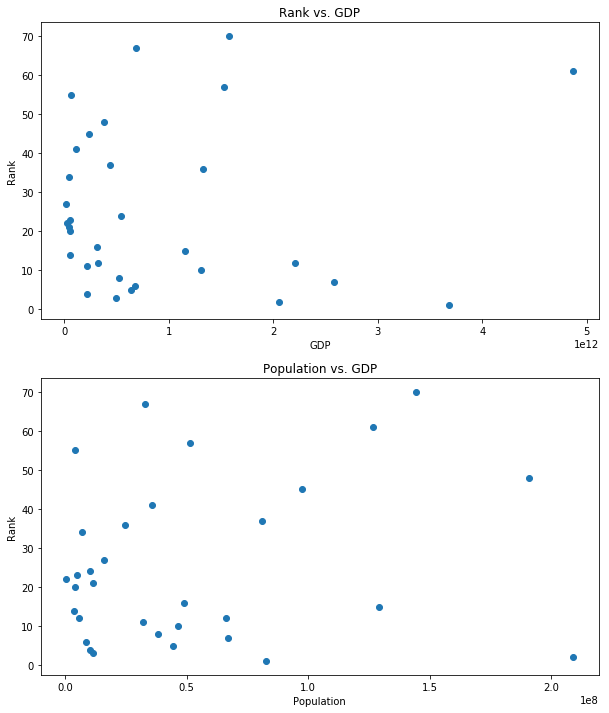

In [120]:
# EDA

# Initialize figure and subplots
fig, ax = plt.subplots(2,1, figsize=(10,12))

# Plot the data
ax[0].scatter(group_data["GDP"].values, group_data["rank"].values)
ax[1].scatter(group_data["population"].values, group_data["rank"].values)

# Add labels
ax[0].set_title("Rank vs. GDP")
ax[1].set_title("Population vs. GDP")
ax[0].set_ylabel("Rank")
ax[1].set_ylabel("Rank")
ax[0].set_xlabel("GDP")
ax[1].set_xlabel("Population");

In [146]:
# Print Baseline Summary
ols_baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        goal_difference   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     35.50
Date:                Fri, 10 Aug 2018   Prob (F-statistic):          2.13e-145
Time:                        22:24:46   Log-Likelihood:                -3559.6
No. Observations:                1817   AIC:                             7175.
Df Residuals:                    1789   BIC:                             7329.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.9832      0.321      3.062      0.002       0.353       1.613
rank_team1                      -0.0050      0.001     -4.980      0.000      -0.007      -0.003
rank_team2                       0.0050      0.001      5.090      0.000       0.003       0.007
population_team1             -2.956e-10   3.53e-10     -0.838      0.402   -9.87e-10    3.96e-10
GDP_per_capita_team1          4.296e-06   2.48e-06      1.733      0.083   -5.65e-07    9.16e-06
population_team2             -1.355e-10   4.86e-10     -0.279      0.781   -1.09e-09    8.18e-10
GDP_per_capita_team2         -1.106e-06   2.55e-06     -0.433      0.665   -6.12e-06     3.9e-06
players_in_top_200_team1         0.0063      0.026      0.242      0.809      -0.045       0.058
age_team1                       -0.0106      0.017     -0.608      0.543      -0.045       0.024
eur_value_team1               1.178e-09   8.52e-10      1.382      0.167   -4.94e-10    2.85e-09
overall_average_team1            0.0117      0.008      1.430      0.153      -0.004       0.028
top_3_leagues_team1             -0.0128      0.015     -0.840      0.401      -0.043       0.017
players_in_top_200_team2        -0.0209      0.027     -0.779      0.436      -0.074       0.032
age_team2                        0.0342      0.017      1.996      0.046       0.001       0.068
eur_value_team2               1.284e-10   8.88e-10      0.145      0.885   -1.61e-09    1.87e-09
overall_average_team2           -0.0261      0.008     -3.209      0.001      -0.042      -0.010
top_3_leagues_team2             -0.0268      0.018     -1.482      0.139      -0.062       0.009
confederation_team1_CAF         -0.5076      0.267     -1.901      0.058      -1.031       0.016
confederation_team1_CONCACAF    -0.5830      0.289     -2.019      0.044      -1.149      -0.017
confederation_team1_CONMEBOL     0.1504      0.303      0.495      0.620      -0.445       0.746
confederation_team1_OFC         -0.1956      0.454     -0.431      0.667      -1.086       0.695
confederation_team1_UEFA        -0.2066      0.222     -0.932      0.352      -0.642       0.228
confederation_team2_CAF          0.3581      0.267      1.341      0.180      -0.166       0.882
confederation_team2_CONCACAF     0.3254      0.283      1.151      0.250      -0.229       0.880
confederation_team2_CONMEBOL    -0.5437      0.297     -1.827      0.068      -1.127       0.040
confederation_team2_OFC          0.3143      0.425      0.740      0.459      -0.518       1.147
confederation_team2_UEFA        -0.1314      0.224     -0.587      0.557      -0.570       0.308
host_team1                      -0.5976      0.095     -6.261      0.000      -0.785      -0.410
rank_diff                       -0.0100      0.001    -14.943      0.000    